### MP Neuron Model

$\Large{y}= \sum _{i=1}^{n} x_{i}$ , where n= Total number of Features


1. **Data** - It can work with only binary inputs.<br>
2. **Task**  - It can perform binary Classification tasks  - i.e. Boolean Output <br>
3. **Model** - <br>
    &emsp;&emsp; a. Linear Model - Can only work well with linearly Separable data. <br>
    &emsp;&emsp; b. Parameters  - b <br>
    &emsp;&emsp; c. b can only take fixed set of values - $0<=b<=n$ <br>
    &emsp;&emsp; d. Change in b can only modify the Intercept. Since there is no way to control the slope of the line/hyperplane it is not very flexible. <br>
4. **Loss Function** - Squared Error Loss $L_{i} = \sum _ {i}^{n}(y_{i} - \hat{y})$<br>
5. **Learning Algorithm**-  Since there is just one parameter b with a well defined search space we can use a brute force algorithm to find the best b which can minimises the Loss.



In [8]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
breast_cancer = datasets.load_breast_cancer()

In [11]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
X = breast_cancer.data
Y = breast_cancer.target

In [6]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [12]:
data = pd.DataFrame(breast_cancer.data , columns=breast_cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data['class'] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [16]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [17]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#### One observation can be made here that the Mean value of all the Features for Class - 0 is always higher than Class-1 .

In [18]:
# Test Train Split
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop('class', axis=1)
Y = data['class']
type(X)

pandas.core.frame.DataFrame

In [35]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=1)

In [36]:
print("Percentage of Malignant samples in Train set : {}".format((Y_train.value_counts()[1]/X_train.shape[0])*100))
print("Percentage of Benign samples in Train set : {}".format((Y_train.value_counts()[0]/X_train.shape[0])*100))

Percentage of Malignant samples in Train set : 62.6953125
Percentage of Benign samples in Train set : 37.3046875


In [37]:
print("Percentage of Malignant samples in Test set : {}".format((Y_test.value_counts()[1]/X_test.shape[0])*100))
print("Percentage of Benign samples in Test set : {}".format((Y_test.value_counts()[0]/X_test.shape[0])*100))

Percentage of Malignant samples in Test set : 63.1578947368421
Percentage of Benign samples in Test set : 36.84210526315789


* The above ratio's or distribution of classes shall remain same due to the stratification we have done during the Splits, no matter how many times we do this Train/Test Split.
* The random state has been used during the train test split because everytime we do a train test split a shuffling is possible. Maintaining a similar distribution of the classes doesn't mean that the data across Train Test split cannot be shuffled. The shuffling can change the statistical properties of each feature like mean of a feature might change across the original, Train and Test data.
* Let's verify that the shuffling doesn't happen by choosing a feature 'mean radius' . Ideally if the shuffling doesn't happen The mean value of this feature within the Overall data, Train data and Test data shall not change with train/test Split.

In [43]:
X['mean radius'].mean(), X_train['mean radius'].mean(), X_test['mean radius'].mean()

(14.127291739894552, 14.05865625, 14.743807017543858)

In [44]:
import matplotlib.pyplot as plt

In [46]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [52]:
X_train.shape, X_train.T.shape

((512, 30), (30, 512))

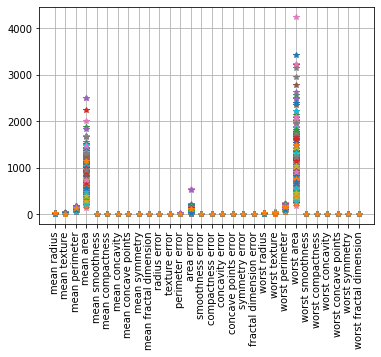

In [53]:
plt.plot(X_train.T,"*")
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

* All these columns have 512 values basically. So corressponding to each feature we have plotted these values. For some of the features we can see some spread, but for most of the features the data is overlapping.

In [86]:
# We are applying a cut function on each of the features of the dataframe to cut into 2 bins.
X_binarised_train = X_train.apply(pd.cut, bins=2, labels= [0,1])
X_binarised_test = X_test.apply(pd.cut, bins=2, labels = [0,1])

In [76]:
type(X_binarised_train)

pandas.core.frame.DataFrame

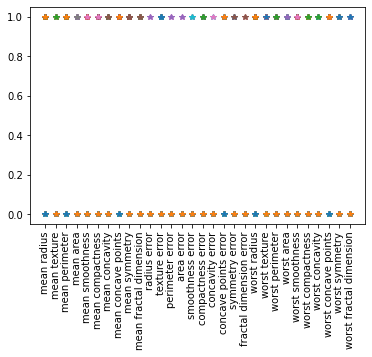

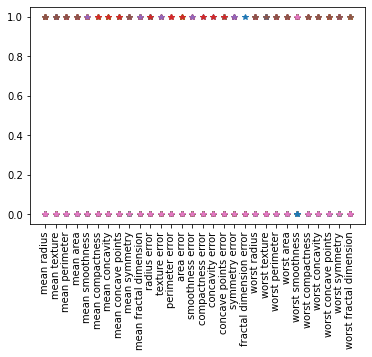

In [77]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

plt.plot(X_binarised_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [87]:
# converting Pandas dataframe into numpy arrays
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

print(X_binarised_train)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]]


### MP Neuron Model

$\Large{y}= \sum _{i=1}^{n} x_{i}$ , where n= Total number of Features

#### Let's do an inference for any given data point using the above model

In [70]:
b = 3
i = np.random.randint(X_binarised_train.shape[0])
print("Index value is :",i)
if np.sum(X_binarised_train[i,:])>=b:
    print("MP Neuron Inference is Malignant ")
else:
    print("MP Neuron Inference is Benign")
if Y_train[i]==1:
    print("Ground Truth is Malignant")
else:
    print("Ground Truth is Benign")

Index value is : 412
MP Neuron Inference is Malignant 
Ground Truth is Malignant


### Our Goal is to find the value of b such that Accuracy across all the rows is maximised

In [88]:
def calculate_accuracy(X,Y):
    for b in range(X.shape[1]+1):
        hits = 0
        for x,y in zip(X, Y):
            #print(x)
            if np.sum(x)>=b:
                y_pred = 1
                if y==y_pred:
                    hits+=1
        print('For b : {} Accuracy is : {}'.format(b, hits/X.shape[0]))


In [89]:
calculate_accuracy(X_binarised_train,Y_train)

For b : 0 Accuracy is : 0.626953125
For b : 1 Accuracy is : 0.220703125
For b : 2 Accuracy is : 0.125
For b : 3 Accuracy is : 0.0546875
For b : 4 Accuracy is : 0.025390625
For b : 5 Accuracy is : 0.013671875
For b : 6 Accuracy is : 0.009765625
For b : 7 Accuracy is : 0.00390625
For b : 8 Accuracy is : 0.00390625
For b : 9 Accuracy is : 0.00390625
For b : 10 Accuracy is : 0.001953125
For b : 11 Accuracy is : 0.0
For b : 12 Accuracy is : 0.0
For b : 13 Accuracy is : 0.0
For b : 14 Accuracy is : 0.0
For b : 15 Accuracy is : 0.0
For b : 16 Accuracy is : 0.0
For b : 17 Accuracy is : 0.0
For b : 18 Accuracy is : 0.0
For b : 19 Accuracy is : 0.0
For b : 20 Accuracy is : 0.0
For b : 21 Accuracy is : 0.0
For b : 22 Accuracy is : 0.0
For b : 23 Accuracy is : 0.0
For b : 24 Accuracy is : 0.0
For b : 25 Accuracy is : 0.0
For b : 26 Accuracy is : 0.0
For b : 27 Accuracy is : 0.0
For b : 28 Accuracy is : 0.0
For b : 29 Accuracy is : 0.0
For b : 30 Accuracy is : 0.0


In [90]:
# Let's flip the binarisation due to the observation that Mean value of class-0 was always higher than class -1.
X_binarised_train = X_train.apply(pd.cut, bins=2, labels= [1,0]).values
X_binarised_test = X_test.apply(pd.cut, bins=2, labels = [1,0]).values

In [91]:
calculate_accuracy(X_binarised_train,Y_train)

For b : 0 Accuracy is : 0.626953125
For b : 1 Accuracy is : 0.626953125
For b : 2 Accuracy is : 0.626953125
For b : 3 Accuracy is : 0.626953125
For b : 4 Accuracy is : 0.626953125
For b : 5 Accuracy is : 0.626953125
For b : 6 Accuracy is : 0.626953125
For b : 7 Accuracy is : 0.626953125
For b : 8 Accuracy is : 0.626953125
For b : 9 Accuracy is : 0.626953125
For b : 10 Accuracy is : 0.626953125
For b : 11 Accuracy is : 0.626953125
For b : 12 Accuracy is : 0.626953125
For b : 13 Accuracy is : 0.626953125
For b : 14 Accuracy is : 0.626953125
For b : 15 Accuracy is : 0.626953125
For b : 16 Accuracy is : 0.626953125
For b : 17 Accuracy is : 0.626953125
For b : 18 Accuracy is : 0.626953125
For b : 19 Accuracy is : 0.626953125
For b : 20 Accuracy is : 0.626953125
For b : 21 Accuracy is : 0.625
For b : 22 Accuracy is : 0.623046875
For b : 23 Accuracy is : 0.623046875
For b : 24 Accuracy is : 0.623046875
For b : 25 Accuracy is : 0.6171875
For b : 26 Accuracy is : 0.61328125
For b : 27 Accuracy 

In [93]:
from sklearn.metrics import accuracy_score

#### Given that we have found the value of b for which we have the highest Training Accuracy. Let's test this value of b on Test dataset

In [94]:
b = 20
y_preds = []
for x in X_binarised_test:
#print(x)
    if np.sum(x)>=b:
        y_pred = 1
        y_preds.append(y_pred)
    else:
        y_preds.append(0)
        
print('For b : {} Accuracy is : {}'.format(b, accuracy_score(Y_test,y_preds)))



For b : 20 Accuracy is : 0.8947368421052632


In [95]:
class MPNeuron:
    def __init__(self) -> None:
        self.b = None
    
    def model(self,x):
        return (np.sum(x)>=self.b)

    def predict(self, X):
        y = []
        for x in X:
            y.append(self.model(x))
        return np.array(y)
    
    # find optimal value of b
    def fit(self, X , Y):
        accuracy = {}
        for b in range(X.shape[1]+1):
            # update model's b
            self.b = b
            y_preds = self.predict(X)
            accuracy[b] = accuracy_score(Y, y_preds)
        
        best_b = max(accuracy, key= accuracy.get)
        self.b = best_b
        print('Optimal value of b is :', best_b)
        print('Accuracy with best b is :', accuracy[best_b])
    



In [94]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is : 28
Accuracy with best b is : 0.849609375


In [96]:
y_test_preds = mp_neuron.predict(X_binarised_test)
accuracy = accuracy_score(Y_test, y_test_preds)
accuracy

0.7894736842105263